# <font color = 'red'>Problem</font>
A block of mass $m$ is projected up along the surface of a plane inclined at angle $\theta$. The initial speed is $v_0$, and the coefficients of static and kinetic friction are both equal to $\mu$. The block reaches a highest point and then slides back down to the starting point.
1. Show that for the block to in fact slide back down instead of remaining at rest at the highest point, $\tan(\theta)$ must be greater than $\mu$.
2. Assuming that $\tan(\theta)>\mu$, find the total time(up and down) taken by the block and also compare it with the case if there is no friction.
3. Assuming that $\tan(\theta)>\mu$, show that for a given $\theta$, the value of $\mu$ that yeilds to *minimum total time* is given by $\mu \approx (0.397)\tan(\theta)$. Also note that this minimum time turns out to be about the 90% of the time it would take if the plane were frictionless.
![block](block.png)

# <font color = 'green'>Solution</font>
1. Iff $mg\sin{\theta}> f$ then the block will silde from the top. Now as the coefficient of kinetic friction is $\mu$. So $f = \mu mg \cos{\theta}$. Solve the first eqaution you will end up with $$\tan{\theta}>\mu$$.
2. If we give the initial velocity $v_0$ to the block time is taken to reach to the top is $t_u$.$$t_u = \frac{v_0}{a_u}$$Where $a_u$ is $g\sin{\theta}+\mu g \cos{\theta}$. The length travelled by the block is $l = v_0 t_u - a_u t_u^2/2$ (Using $s = ut+at^2/2$). Solving this $l = \frac{v_0^2}{2a_u}$ Now time is taken to reach at bottom is $$t_d = \sqrt{\frac{2l}{a_d}}$$ $$\implies t_d = \frac{v_0}{\sqrt{a_u a_d}}$$ Where $a_d = g\sin{\theta}-\mu g \sin{\theta}$. So the total time $T_f = t_u+t_d$, $f$ subcript for friction. So total time is, $$T_f = v_0\left({\frac{1}{a_u}+\frac{1}{\sqrt{a_u a_d}}}\right)$$ Substituting $a_u$ and $a_d$, $$T_f = \frac{v_0}{g}\left({\frac{1}{\sin{\theta}+\mu \cos{\theta}}+\frac{1}{\sqrt{\sin^2{\theta}-\mu^2 \cos^2{\theta}}}}\right)$$

    If there is no friction then the total time will be $T_0 = \frac{2v_0}{g\sin{\theta}}$. So we can write, 
    
    $$T_f = \frac{T_0}{2}\left(\frac{1}{1+\mu \cot{\theta}}+\frac{1}{\sqrt{1-\mu^2 \cot^2{\theta}}}\right)$$Let $x = \mu \cot{\theta}$,$$T_f = \frac{T_0}{2}\left(\frac{1}{1+x}+\frac{1}{\sqrt{1-x^2}}\right)$$Now interesting part comes out, $\left(\frac{1}{1+x}+\frac{1}{\sqrt{1-x^2}}\right)$.
    * If $\left(\frac{1}{1+x}+\frac{1}{\sqrt{1-x^2}}\right) > 2$ i.e, $T_f > T_0$. It follows that $x>\frac{1}{\sqrt{2}}$
    * If $x = \frac{1}{\sqrt{2}}$ then time taken in both cases will be same?
    * If $x < \frac{1}{\sqrt{2}}$ then *there will less time in case of friction*?
    
    Note, $x = \frac{\mu}{\tan{\theta}}$ if $\frac{\mu}{\tan{\theta}} < \frac{1}{\sqrt{2}}$ then it contradics our assumption $\tan{\theta} > \mu$. So No sliding will be there when the block is at the top. So last two cases are possible..
  
3. Now for a given $\theta$(i.e, it is constant), $g(x) = \left(\frac{1}{1+x}+\frac{1}{\sqrt{1-x^2}}\right)$. we have to find minimize $T_f$ so $\frac{dT_f}{dx}=0$,$$\frac{-1}{(1+x)^2}+\frac{x}{(1-x^2)^{3/2}}=0$$ 

$$\implies 2x^3-2x^2+3x -1 =0$$

We have to find the root of the equation. We can use **Newton-Raphson method** to find it numerically. So $f(x) = 2x^3-2x^2+3x -1$ and $f'(x) = 6x^2-4x+3$. Taking care of **zero slope** and continuity of the function in the real number domain, I make a guess $x = 3$.

In [1]:
# NR Method Python code
def NR(x, f, df, err):           # x  -> initial Guess
    count = 0 #To find the number of iteration
    while abs(f(x)) > err:       # f  -> function
        x -= f(x)/df(x)          # df -> derivative of the function
        count += 1               # err -> error
    return x, count

In [2]:
def f(x): return 2*x**3 - 2*x**2 + 3*x - 1
#Initial guess = 3
# error = 0.01
NR(3, lambda x: 2*x**3 - 2*x**2 + 3*x - 1, lambda x: 6*x**2 - 4*x + 3, 0.01 )

(0.4000555228269637, 5)

In [3]:
#Initial guess = 3
# error = 0.001
NR(3, lambda x: 2*x**3 - 2*x**2 + 3*x - 1, lambda x: 6*x**2 - 4*x + 3, 0.001 )

(0.39661023384068556, 6)

In [4]:
#Initial guess = 3
# error = 0.00001
NR(3, lambda x: 2*x**3 - 2*x**2 + 3*x - 1, lambda x: 6*x**2 - 4*x + 3, 0.00001 )

(0.39661023384068556, 6)

We can plot the function to verify that is $x = 0.3966$ real minima or not.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, sqrt, exp
plt.style.use(['science', 'notebook', 'grid'])


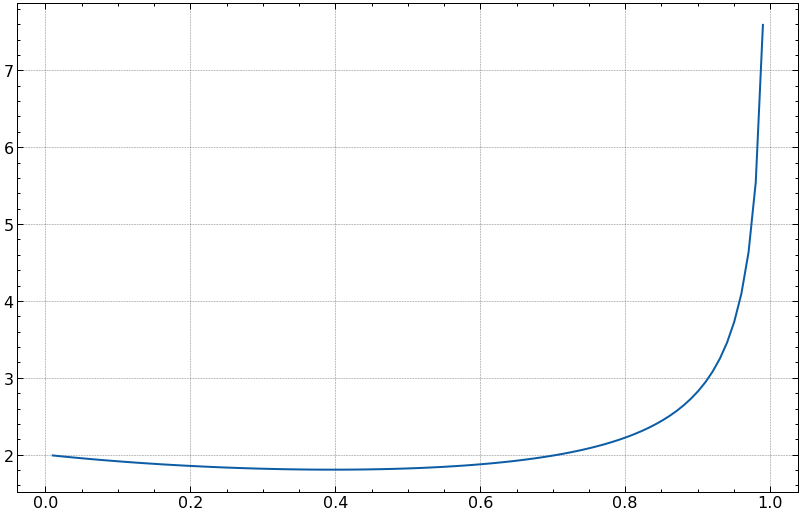

In [6]:
x1 = np.linspace(0.01, 0.99, 100)
def g(x): return 1/(1+x) + 1/np.sqrt(1-x**2)
y1 = g(x1)

plt.figure(figsize = (14, 9))
plt.plot(x1, y1)
plt.show()

# Physics
Time taken will be minimum in case of friction when $x \approx 0.397$ i.e, $\mu \approx 0.397 \tan{\theta}$ and $g(x) = 1.805$ . Now if there is no friction $\mu = 0$ i.e, $g(x) = 2$.

In [7]:
(g(0.397)/2)*100

90.26797588828866

So, minimum time turns out to be about the 90% of the time it would take if the plane were frictionless.